# Explore data from activity trackers.

##### Activity trackers are devices that are designed to measure and track various aspects of physical activity. These devices are often worn on the wrist, but they can also be worn on other parts of the body, such as the waist or ankle. Many activity trackers use sensors to measure things like steps taken, distance traveled, and calories burned. They may also track sleep patterns, heart rate, and other indicators of physical activity and health.

##### One of the key benefits of activity trackers is that they can provide users with valuable insights into their physical activity levels. By tracking various metrics over time, users can see how their activity levels change and identify patterns in their behavior. This can be useful for those who are trying to improve their fitness, lose weight, or simply maintain a healthy lifestyle.

##### In addition to tracking physical activity, many activity trackers also offer other features, such as the ability to connect with smartphone apps or online platforms to track progress and set goals. Some activity trackers also offer additional features, such as the ability to track nutrition and hydration, or to provide reminders and alerts to help users stay on track.

##### Overall, activity trackers are a useful tool for anyone looking to track and improve their physical activity levels. By providing valuable data and insights, they can help users make informed decisions about their health and wellness.

#### Data cleaning

Data cleaning is the process of identifying and correcting or removing errors and inconsistencies in data. In Python, data cleaning can be accomplished using a variety of tools and libraries. These tools provide functions and methods for handling missing values, correcting data types, and removing duplicates, among other tasks. Data cleaning is an important step in the data analysis process, as it helps ensure that the data is accurate and reliable, and that it can be effectively analyzed and used to draw meaningful insights.

In [859]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [860]:
import pandas as pd

# Read in the first data set
df1 = pd.read_csv('steps.csv',delimiter=';')

# Read in the second data set
df2 = pd.read_csv('survey.csv')

In [861]:
# Merge the two data sets
df = pd.merge(df1, df2, on='id')

In [862]:
df.shape

(929, 337)

In [863]:
x = df.isna().mean()*100 # store column wise percentage of NaN

In [864]:
col_with_allNaN = []
for i,j in zip(x,x.index):
    if i==100: # check for column with all NaN
        print(j)
        col_with_allNaN.append(j)

13-5-2014


In [865]:
df.dropna(axis = 1,how='all',inplace=True) # drop columns with all NaN, axis = 1 is for column

In [866]:
df.shape

(929, 336)

In [867]:
# Now keep participants with minimum 50% data in their respective rows.
df.dropna(axis = 0,how='all',inplace=True,thresh=.5*df1.shape[1])

In [868]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,11-5-2014,12-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
13,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lille,Male,45-54,1,1,Master or doctorate,170.0,83.0
21,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Bordeaux,Female,45-54,4,4,Master or doctorate,170.0,73.0
27,28,NaN,6262.0,16594.0,7708.0,6419.0,10889.0,7663.0,8728.0,15860.0,...,20492.0,3607.0,Lille,Female,35-44,3,3,Bachelor,162.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,NaN,18543.0,18979.0,15262.0,16937.0,22538.0,20108.0,14040.0,18397.0,...,NaN,NaN,Bordeaux,Female,45-54,2,2,Primary,160.0,55.0
915,916,NaN,8667.0,10471.0,659.0,12079.0,5212.0,7308.0,12229.0,7007.0,...,NaN,NaN,Lille,Female,35-44,1,1,High school,160.0,72.0
919,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,25-34,5,3,Bachelor,176.0,70.0
920,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5308.0,...,NaN,NaN,Lille,Female,35-44,5,4,Bachelor,166.0,88.0


In [869]:
list(df1)

['id',
 '20-6-2013',
 '21-6-2013',
 '22-6-2013',
 '23-6-2013',
 '24-6-2013',
 '25-6-2013',
 '26-6-2013',
 '27-6-2013',
 '28-6-2013',
 '29-6-2013',
 '30-6-2013',
 '1-7-2013',
 '2-7-2013',
 '3-7-2013',
 '4-7-2013',
 '5-7-2013',
 '6-7-2013',
 '7-7-2013',
 '8-7-2013',
 '9-7-2013',
 '10-7-2013',
 '11-7-2013',
 '12-7-2013',
 '13-7-2013',
 '14-7-2013',
 '15-7-2013',
 '16-7-2013',
 '17-7-2013',
 '18-7-2013',
 '19-7-2013',
 '20-7-2013',
 '21-7-2013',
 '22-7-2013',
 '23-7-2013',
 '24-7-2013',
 '25-7-2013',
 '26-7-2013',
 '27-7-2013',
 '28-7-2013',
 '29-7-2013',
 '30-7-2013',
 '31-7-2013',
 '1-8-2013',
 '2-8-2013',
 '3-8-2013',
 '4-8-2013',
 '5-8-2013',
 '6-8-2013',
 '7-8-2013',
 '8-8-2013',
 '9-8-2013',
 '10-8-2013',
 '11-8-2013',
 '12-8-2013',
 '13-8-2013',
 '14-8-2013',
 '15-8-2013',
 '16-8-2013',
 '17-8-2013',
 '18-8-2013',
 '19-8-2013',
 '20-8-2013',
 '21-8-2013',
 '22-8-2013',
 '23-8-2013',
 '24-8-2013',
 '25-8-2013',
 '26-8-2013',
 '27-8-2013',
 '28-8-2013',
 '29-8-2013',
 '30-8-2013',
 '3

In [870]:
cols = list(df1)[1:] # get list of columns to apply mean()

In [871]:
cols = list(set(cols) - set(col_with_allNaN))  # remove columns that are already dropped earlier

In [872]:
cols

['25-1-2014',
 '18-8-2013',
 '18-1-2014',
 '7-2-2014',
 '12-5-2014',
 '6-2-2014',
 '12-12-2013',
 '31-7-2013',
 '10-1-2014',
 '1-1-2014',
 '13-2-2014',
 '27-1-2014',
 '21-3-2014',
 '29-4-2014',
 '15-4-2014',
 '16-7-2013',
 '16-9-2013',
 '25-11-2013',
 '22-12-2013',
 '26-8-2013',
 '25-3-2014',
 '7-12-2013',
 '27-7-2013',
 '10-2-2014',
 '22-3-2014',
 '7-7-2013',
 '19-12-2013',
 '19-3-2014',
 '9-4-2014',
 '23-7-2013',
 '6-7-2013',
 '30-4-2014',
 '17-10-2013',
 '14-7-2013',
 '28-11-2013',
 '15-3-2014',
 '28-1-2014',
 '15-2-2014',
 '12-1-2014',
 '23-9-2013',
 '14-3-2014',
 '30-6-2013',
 '11-8-2013',
 '7-3-2014',
 '19-11-2013',
 '23-8-2013',
 '11-2-2014',
 '26-4-2014',
 '16-12-2013',
 '18-2-2014',
 '1-3-2014',
 '21-9-2013',
 '10-12-2013',
 '6-4-2014',
 '11-7-2013',
 '4-3-2014',
 '8-9-2013',
 '24-3-2014',
 '5-8-2013',
 '1-11-2013',
 '30-7-2013',
 '8-10-2013',
 '20-6-2013',
 '30-9-2013',
 '27-3-2014',
 '26-12-2013',
 '25-6-2013',
 '1-8-2013',
 '1-4-2014',
 '17-9-2013',
 '24-9-2013',
 '5-2-2014

In [873]:
# mean_steps_per_participant, apply mean on columns stored in 'cols'

df['mean_steps_per_participant'] = df.loc[:,cols].mean(axis=1)

In [874]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps_per_participant
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
13,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lille,Male,45-54,1,1,Master or doctorate,170.0,83.0,9214.798077
21,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bordeaux,Female,45-54,4,4,Master or doctorate,170.0,73.0,5667.045977
27,28,NaN,6262.0,16594.0,7708.0,6419.0,10889.0,7663.0,8728.0,15860.0,...,3607.0,Lille,Female,35-44,3,3,Bachelor,162.0,58.0,7969.027586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,NaN,18543.0,18979.0,15262.0,16937.0,22538.0,20108.0,14040.0,18397.0,...,NaN,Bordeaux,Female,45-54,2,2,Primary,160.0,55.0,15213.159624
915,916,NaN,8667.0,10471.0,659.0,12079.0,5212.0,7308.0,12229.0,7007.0,...,NaN,Lille,Female,35-44,1,1,High school,160.0,72.0,7140.983471
919,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Male,25-34,5,3,Bachelor,176.0,70.0,9950.074074
920,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5308.0,...,NaN,Lille,Female,35-44,5,4,Bachelor,166.0,88.0,13572.084507


#### Exploratory data analysis


/Users/kiara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kiara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


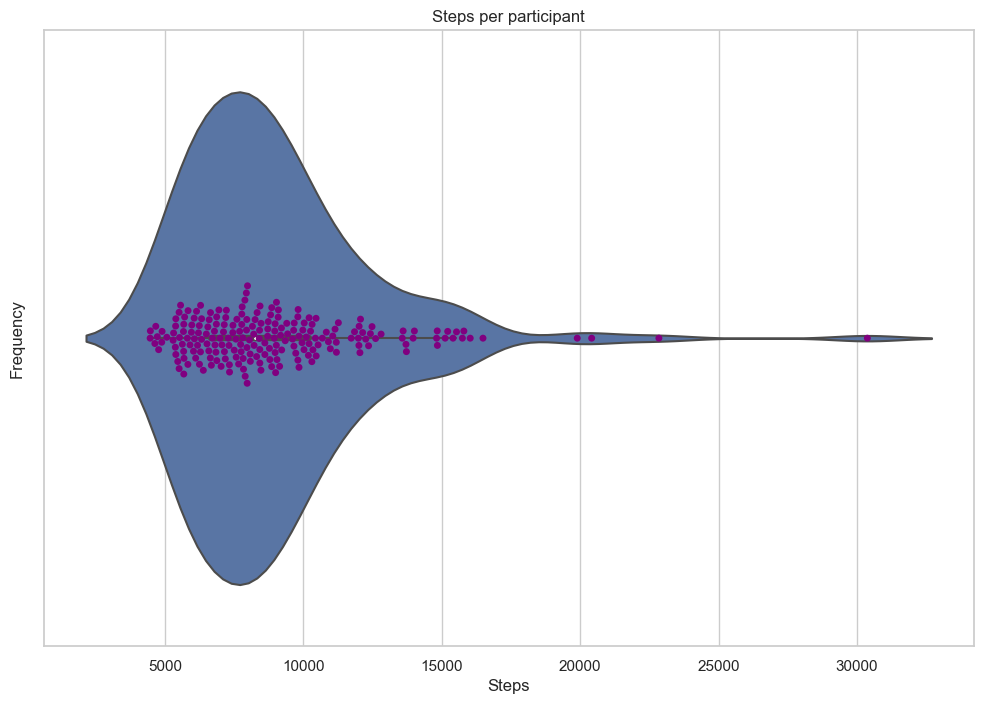

In [875]:
sns.violinplot(df['mean_steps_per_participant'])
sns.swarmplot(df['mean_steps_per_participant'], color='purple') #default color doesn't stand out
plt.title('Steps per participant')
plt.ylabel('Frequency')
plt.xlabel('Steps')
plt.show()

/Users/kiara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


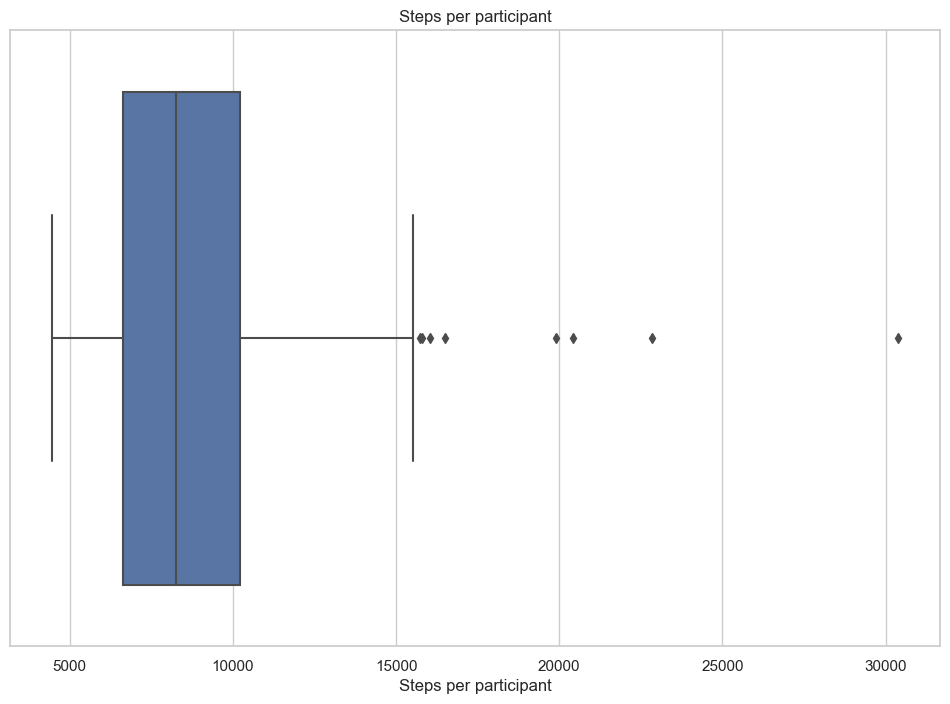

In [876]:
sns.boxplot(df['mean_steps_per_participant'])
plt.title('Steps per participant')
plt.xlabel('Steps per participant')
plt.show()

/Users/kiara/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


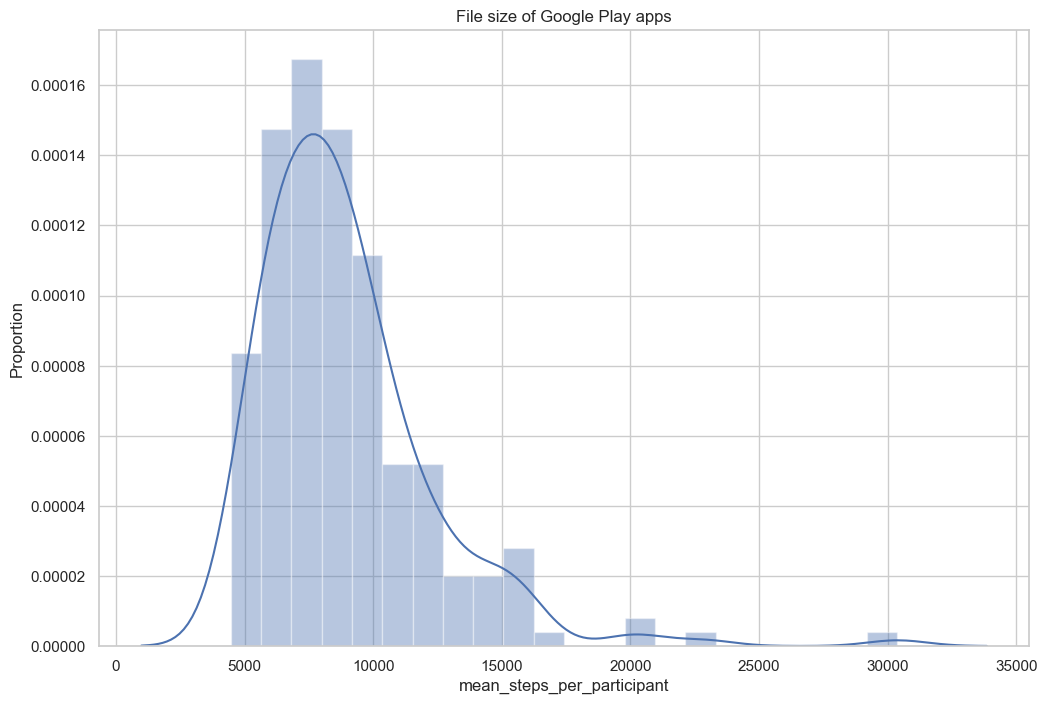

In [877]:
sns.distplot(df['mean_steps_per_participant'])
plt.title('File size of Google Play apps')
plt.ylabel('Proportion')
plt.show() 

#### Summary statistics

In [878]:
df[["mean_steps_per_participant"]].describe()

,mean_steps_per_participant
count,213.000000
mean,8936.632795
std,3384.282788
min,4463.508671
25%,6644.596567
50%,8254.573171
75%,10205.521212
max,30373.808917


##### You can see that there are a few outliers. Most people have steps between 5000 and 10.000 a small part of the group has between 10.000 and 15.0000. And there are a four outliars which goes above 20.000. 

#### The relation of mean steps per participant with two categorical variables

<AxesSubplot:xlabel='mean_steps_per_participant', ylabel='age'>

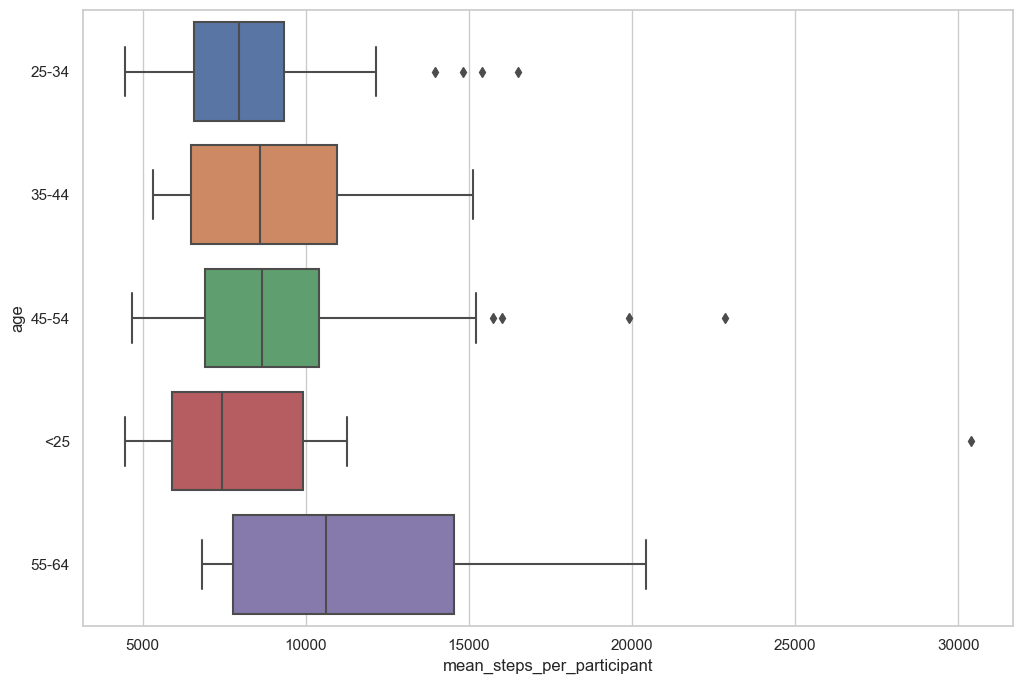

In [879]:
sns.boxplot(x='mean_steps_per_participant', y='age', data=df)

<AxesSubplot:xlabel='age', ylabel='mean_steps_per_participant'>

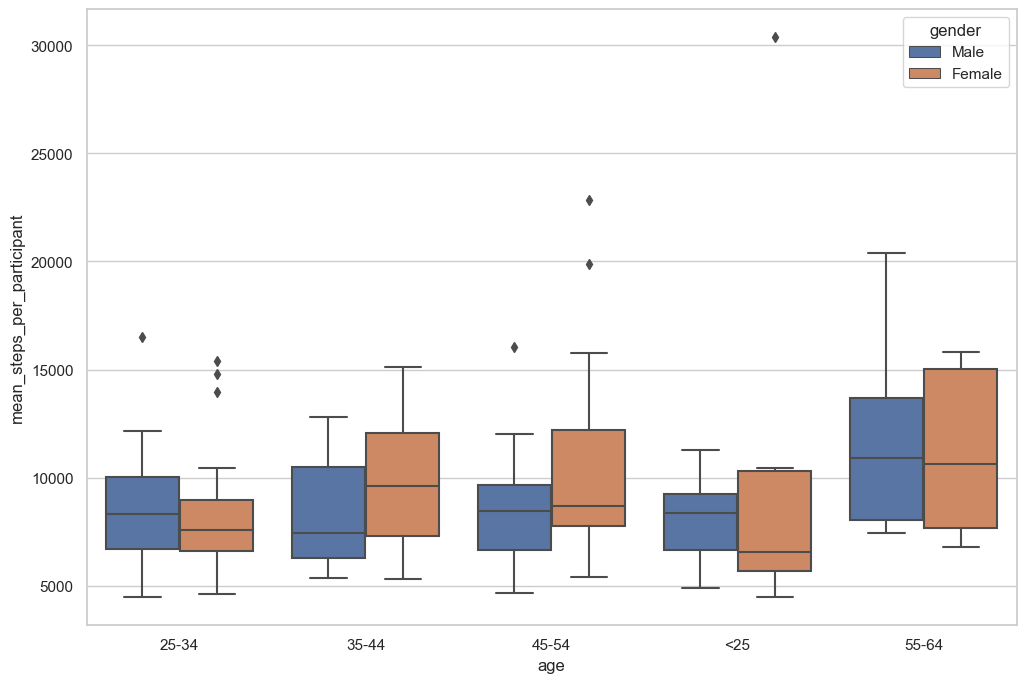

In [880]:
sns.boxplot(x = df['age'],
            y = df['mean_steps_per_participant'],
            hue = df['gender'])

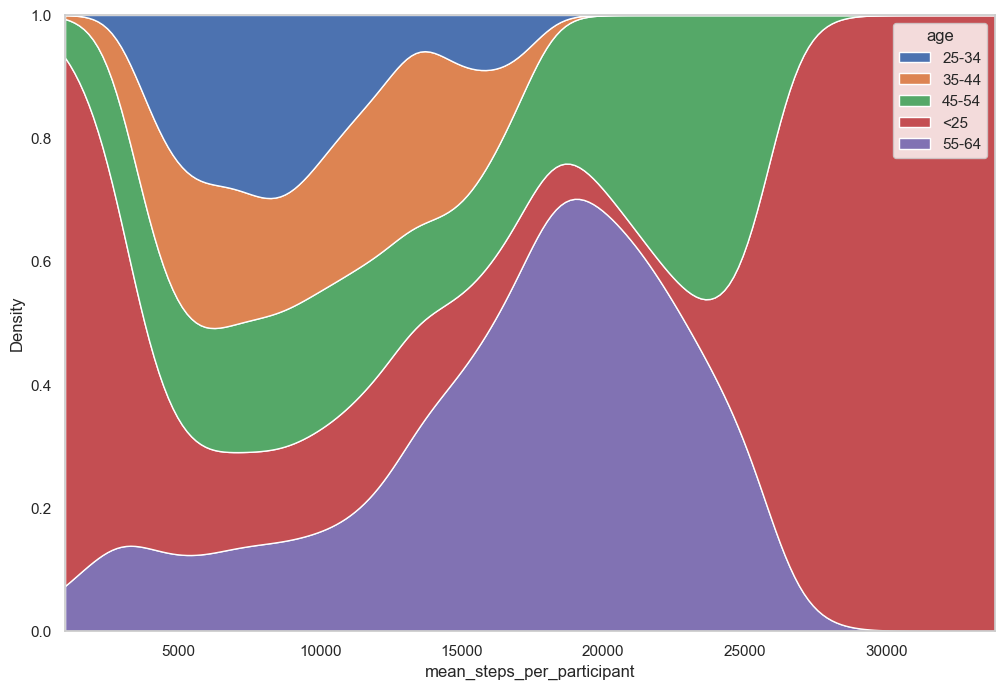

In [881]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# stacked density plot
sns.kdeplot(data=df, x="mean_steps_per_participant", hue="age", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

##### the group of 55 - 65 does not have very big differences between the highest and lowest number of steps compared to other age groups.

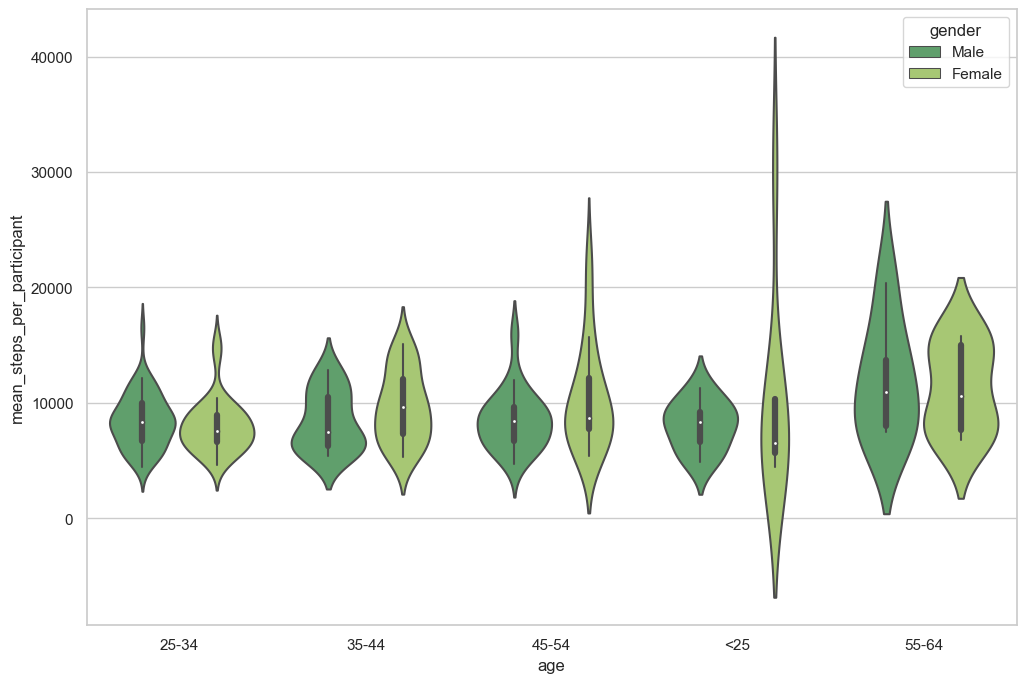

In [882]:
# Grouped violinplot
sns.violinplot(x="age", y="mean_steps_per_participant", hue="gender", data=df, palette="summer")
plt.show()

##### What is remarkable is that the group of women aged <25 has a large difference in the average number of steps per person. The averages differ a lot from each other compared to other age groups.

#### Feature engineering

##### Computing a variable that gives a better indication of a healthy weight than weight alone. I can think of BMI. Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.

In [883]:
# Add a new column for the BMI
df['BMI'] = 0

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Calculate the BMI
    
    bmi = row['weight'] / (row["height"]/100)**2
   
    
    # Save the BMI in the new column
    df.at[index, 'BMI'] = bmi

print(df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
13    14        NaN        NaN        NaN        NaN        NaN        NaN   
21    22        NaN        NaN        NaN        NaN        NaN        NaN   
27    28        NaN     6262.0    16594.0     7708.0     6419.0    10889.0   
..   ...        ...        ...        ...        ...        ...        ...   
913  914        NaN    18543.0    18979.0    15262.0    16937.0    22538.0   
915  916        NaN     8667.0    10471.0      659.0    12079.0     5212.0   
919  920        NaN        NaN        NaN        NaN        NaN        NaN   
920  921        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   

     26-6-2013  27-6-2013  28-6-2013  ...         city  gender 

In [884]:
print(df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
13    14        NaN        NaN        NaN        NaN        NaN        NaN   
21    22        NaN        NaN        NaN        NaN        NaN        NaN   
27    28        NaN     6262.0    16594.0     7708.0     6419.0    10889.0   
..   ...        ...        ...        ...        ...        ...        ...   
913  914        NaN    18543.0    18979.0    15262.0    16937.0    22538.0   
915  916        NaN     8667.0    10471.0      659.0    12079.0     5212.0   
919  920        NaN        NaN        NaN        NaN        NaN        NaN   
920  921        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   

     26-6-2013  27-6-2013  28-6-2013  ...         city  gender 

In [885]:
df.to_csv('dataset_with_bmi.csv', index=False)

#### Exploratory data analysis

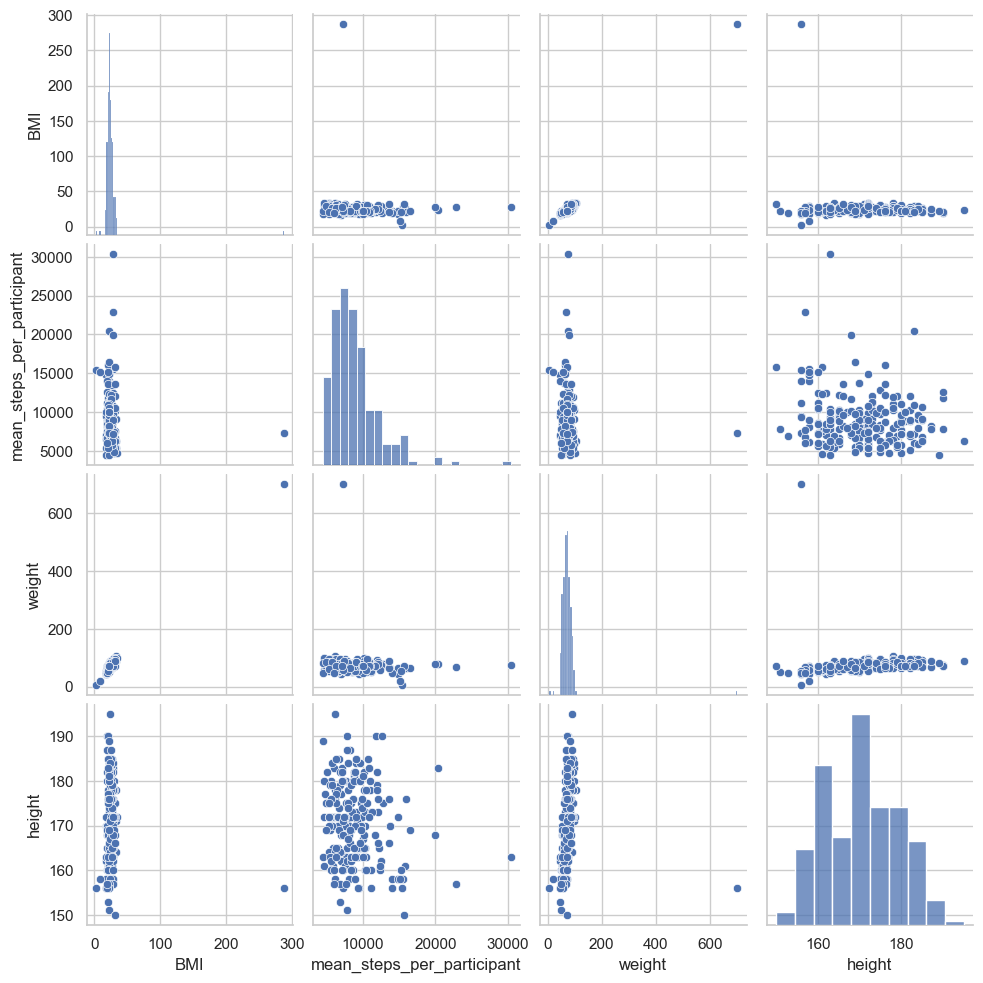

In [886]:
df_sel = df[['age', 'BMI', 'mean_steps_per_participant', 'weight', 'height']] #making a new dataframe with a subset
sns.pairplot(df_sel)
plt.show()

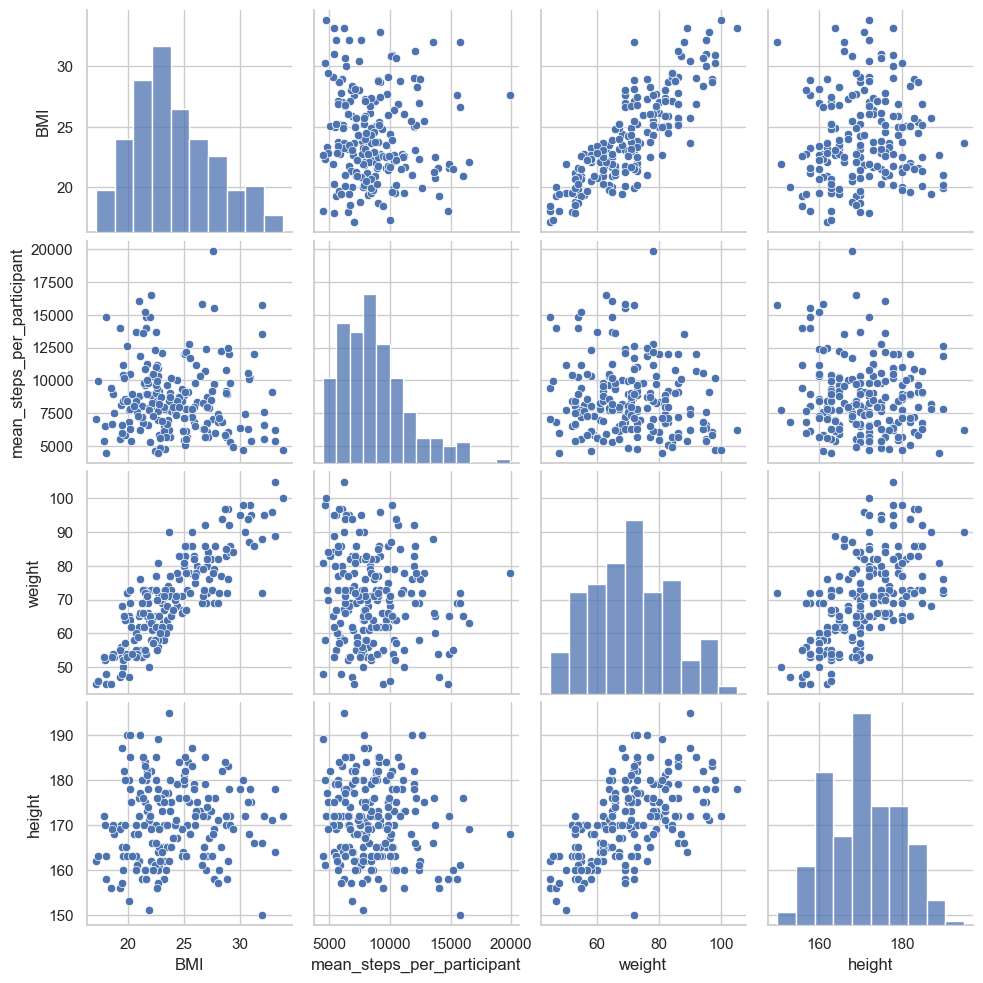

In [887]:
df = df[(df['BMI'] < 50) & (df['mean_steps_per_participant'] < 20000) & (df['BMI'] > 10)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['BMI', 'mean_steps_per_participant', 'weight', 'height' ]]

sns.pairplot(df_sel)
plt.show()

In [888]:
corr = df[['BMI', 'mean_steps_per_participant', 'weight', 'height']].corr()
corr

,BMI,mean_steps_per_participant,weight,height
BMI,1.000000,-0.062336,0.846458,0.083904
mean_steps_per_participant,-0.062336,1.000000,-0.139627,-0.144225
weight,0.846458,-0.139627,1.000000,0.596524
height,0.083904,-0.144225,0.596524,1.000000


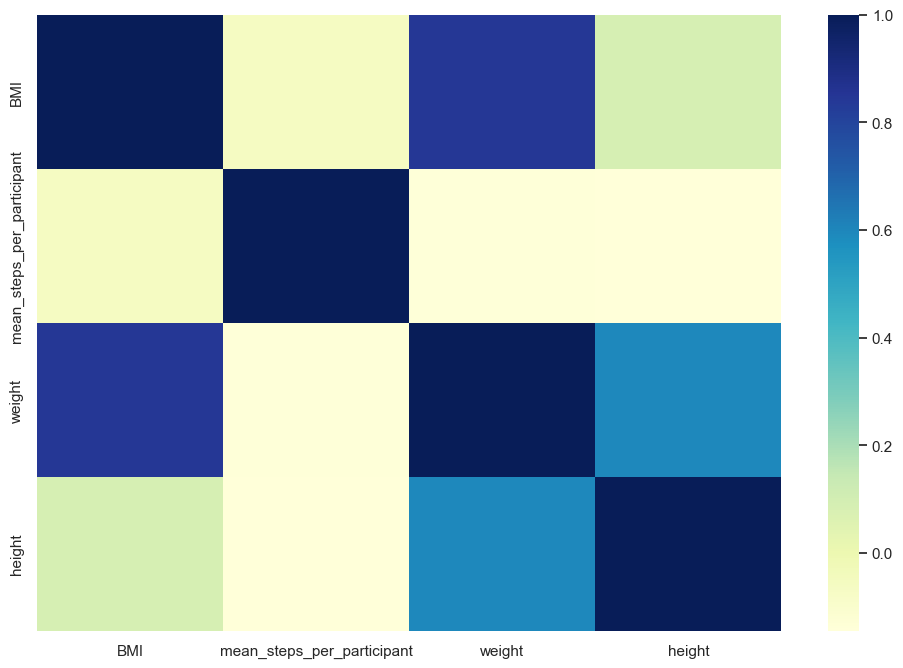

In [889]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

Based on the outcome of the scatterplot and matrix, there is low (no) correlation between mean steps per partisipant and other variables. There is a high correlation between BMI and the variable weight and height

#### Predictive model

##### Linear regression is a statistical method used to model the linear relationship between a dependent variable and one or more independent variables. It is used to predict the value of the dependent variable based on the values of the independent variables.

##### The goal of linear regression is to find the best-fitting regression line, which is the line that minimizes the difference between the predicted values and the observed values of the dependent variable. This is done by adjusting the parameters of the model, such as the slope and intercept of the regression line, to minimize the sum of the squares of the differences between the predicted and observed values.



In [890]:
dummies = pd.get_dummies(df["gender"])
dummies

,Female,Male
0,0,1
1,0,1
13,0,1
21,1,0
27,1,0
...,...,...
913,1,0
915,1,0
919,0,1
920,1,0


In [891]:
df = pd.concat([df, dummies], axis=1) #add to dataframe

In [892]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,age,hh_size,education,education_1,height,weight,mean_steps_per_participant,BMI,Female,Male
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,0,1
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,0,1
13,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45-54,1,1,Master or doctorate,170.0,83.0,9214.798077,28.719723,0,1
21,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45-54,4,4,Master or doctorate,170.0,73.0,5667.045977,25.259516,1,0
27,28,NaN,6262.0,16594.0,7708.0,6419.0,10889.0,7663.0,8728.0,15860.0,...,35-44,3,3,Bachelor,162.0,58.0,7969.027586,22.100290,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,NaN,18543.0,18979.0,15262.0,16937.0,22538.0,20108.0,14040.0,18397.0,...,45-54,2,2,Primary,160.0,55.0,15213.159624,21.484375,1,0
915,916,NaN,8667.0,10471.0,659.0,12079.0,5212.0,7308.0,12229.0,7007.0,...,35-44,1,1,High school,160.0,72.0,7140.983471,28.125000,1,0
919,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25-34,5,3,Bachelor,176.0,70.0,9950.074074,22.598140,0,1
920,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5308.0,...,35-44,5,4,Bachelor,166.0,88.0,13572.084507,31.934969,1,0


#### Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [893]:
X = df[['height', 'weight', 'BMI']] #to use sk-learn, we need to create lists of the two variables
y = df['mean_steps_per_participant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data

LinearRegression()

In [894]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe

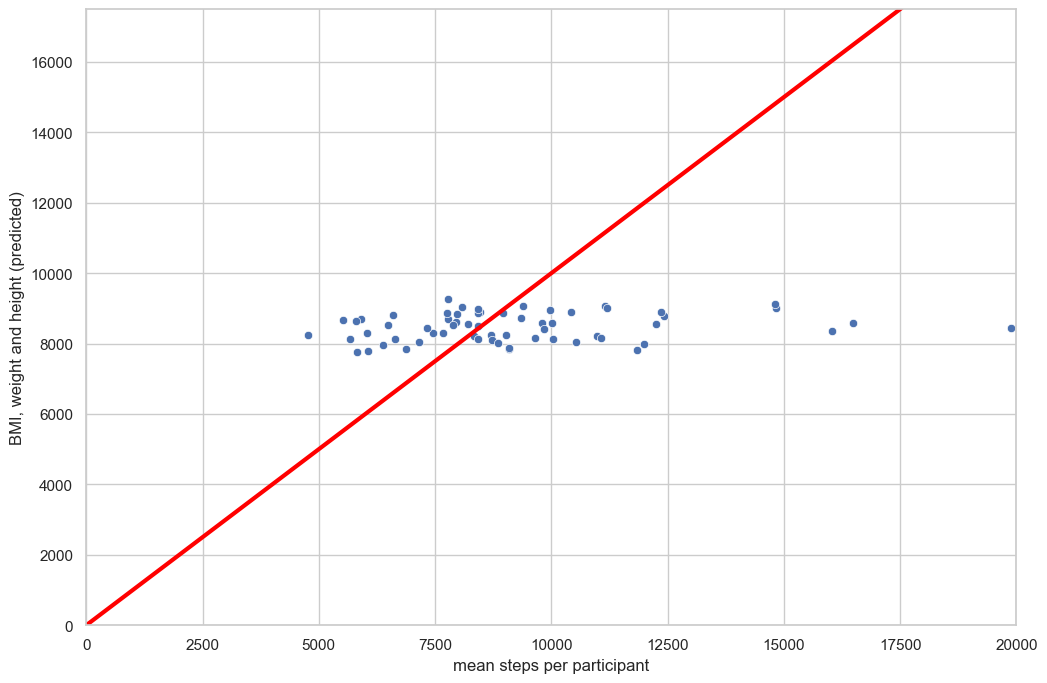

In [895]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 20000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 17500) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('mean steps per participant')
plt.ylabel('BMI, weight and height (predicted)')
plt.show()

## Evaluating the model ##

In [896]:
r2_score(y_test, y_test_p)

-0.03181945595939961

In [897]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

2903.218672609251

## Conclusion

Mean steps per participant does not seem to have a high correlation with other variables, and that's also why the R2 score is low. 

